# MNIST digits

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
# Download the dataset
(xtrain, ytrain), (xtest, ytest) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Set aside some training data for validation
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.1)

In [4]:
# Check the shapes
print(xtrain.shape)
# (# of instances, 28 pixels by 28 pixels)
print(xtest.shape)
print(xval.shape)

(54000, 28, 28)
(10000, 28, 28)
(6000, 28, 28)


In [ ]:
xtrain[0]

In [10]:
ytrain[0]

7

In [11]:
# scale values so NN doesnt have to deal with 0 to 255
xtrain = xtrain / 255
xtest = xtest / 255
xval = xval / 255

# Shallow network

In [14]:
import pandas as pd
import seaborn as sns

In [15]:
# Design the network
# 784 inputs 1 for each pixel (28x28)
# 10 output layers
network = keras.models.Sequential([
  keras.Input(shape=(28, 28)),
  keras.layers.Flatten(), # turns 1 image to 784 inputs
  keras.layers.Dense(64, activation = "relu"),
  keras.layers.Dense(10, activation = "softmax")
])

In [17]:
# count the parameters
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# train the network
stopping = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights=True)
network.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"], optimizer = "adam")
# batch size updates network after chunk of results - 1 update per chunk so faster
# also causes less variability due to outliars and smooths out training
# callbacks - prevent overfitting
history = network.fit(xtrain,ytrain, epochs = 100, validation_data = (xval, yval), batch_size=32, callbacks = [stopping], verbose = False)

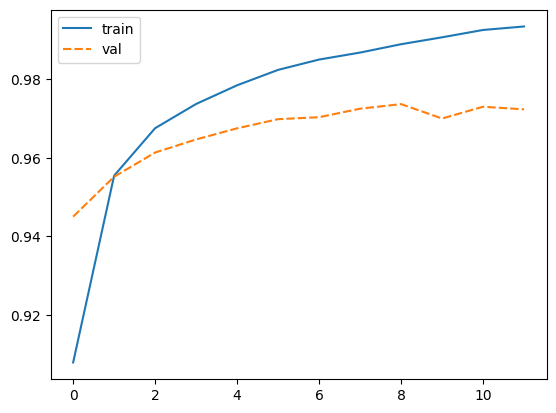

In [21]:
# Plot the learning curve
curve = pd.DataFrame({"train": history.history["accuracy"], "val": history.history["val_accuracy"]})
plot = sns.lineplot(data=curve)

In [23]:
# Evaluate on the test data
network.evaluate(xtest, ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0809 - accuracy: 0.9761


[0.08086825907230377, 0.9761000275611877]

# Convolutional network

In [25]:
# Design the network
convnet = keras.models.Sequential([
  keras.Input(shape=(28,28,1)), # change 1 to 3 for RGB
  keras.layers.Conv2D(32, kernel_size = 3, padding = "same", activation="relu"),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, kernel_size = 3, padding = "same", activation="relu"),
  keras.layers.MaxPooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(10, activation="softmax")
])

In [26]:
# count params
convnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [27]:
# train the network
stopping = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights=True)
convnet.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"], optimizer = "adam")
# batch size updates network after chunk of results - 1 update per chunk so faster
# also causes less variability due to outliars and smooths out training
# callbacks - prevent overfitting
history = convnet.fit(xtrain,ytrain, epochs = 100, validation_data = (xval, yval), batch_size=32, callbacks = [stopping], verbose = False)

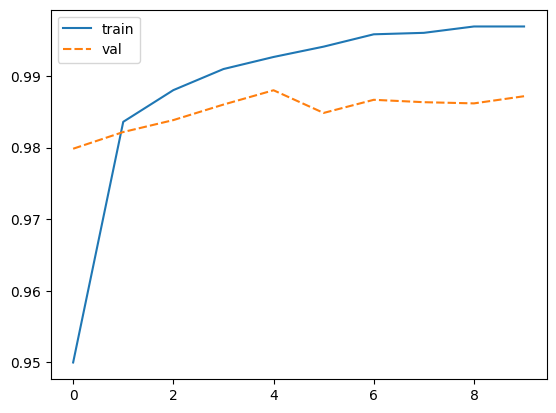

In [28]:
# Plot the learning curve
curve = pd.DataFrame({"train": history.history["accuracy"], "val": history.history["val_accuracy"]})
plot = sns.lineplot(data=curve)

In [29]:
# Evaluate on the test data
convnet.evaluate(xtest, ytest)

313/313 [==============================] - 1s 3ms/step - loss: 0.0305 - accuracy: 0.9900


[0.030527856200933456, 0.9900000095367432]